<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2026-01-01 19:54:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.6MB/s    in 2.7s    

2026-01-01 19:54:14 (55.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipykernel_1689/1250293783.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Age_numeric'] = df_top5['Age'].map(age_mapping)


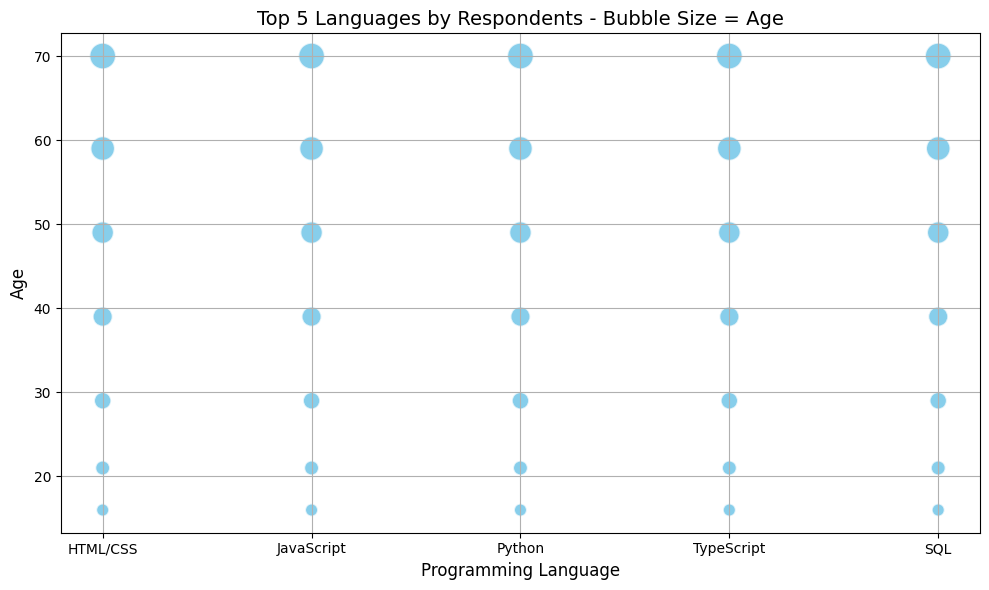

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with NaN in LanguageHaveWorkedWith
df_lang = df.dropna(subset=['LanguageHaveWorkedWith'])

# Split multiple languages into individual rows
df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Count users per language
top5_lang = df_lang['Language'].value_counts().nlargest(5).index

# Filter dataset to only Top 5 languages
df_top5 = df_lang[df_lang['Language'].isin(top5_lang)]

# Map Age to numeric for bubble size (or use ConvertedCompYearly)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_top5['Age_numeric'] = df_top5['Age'].map(age_mapping)

# Drop rows without Age
df_top5 = df_top5.dropna(subset=['Age_numeric'])

# Bubble plot: Language vs Job Satisfaction (if available)
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df_top5['Language'],
    y=df_top5['Age_numeric'],
    s=df_top5['Age_numeric']*5,   # Bubble size by age
    alpha=0.6,
    color='skyblue',
    edgecolors='w'
)

plt.title('Top 5 Languages by Respondents - Bubble Size = Age', fontsize=14)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


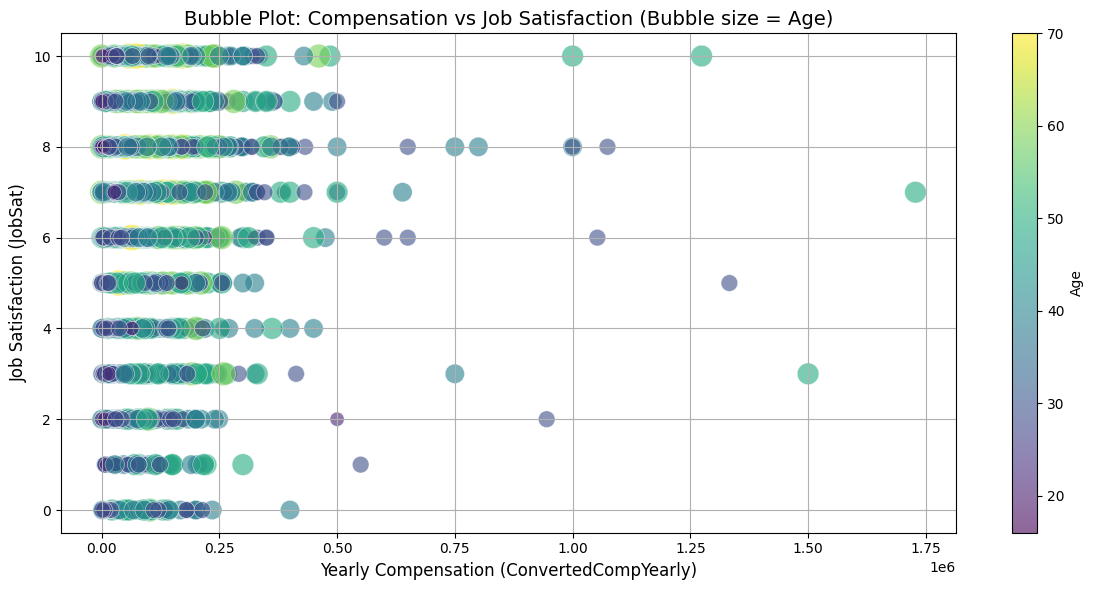

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Convert 'ConvertedCompYearly' and 'JobSat' to numeric, coerce errors to NaN
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Map 'Age' ranges to approximate numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in key columns
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age_numeric'])

# Optional: limit to top 5000 rows to make the plot faster (if dataset is huge)
df_cleaned = df_cleaned.head(5000)

# Scale Age for bubble size (larger bubbles for older respondents)
df_cleaned['Age_scaled'] = df_cleaned['Age_numeric'] * 5

# Create bubble plot
plt.figure(figsize=(12, 6))
plt.scatter(
    x=df_cleaned['ConvertedCompYearly'],
    y=df_cleaned['JobSat'],
    s=df_cleaned['Age_scaled'],  # bubble size
    c=df_cleaned['Age_numeric'], # color by age
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Add labels and title
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSat)', fontsize=12)
plt.colorbar(label='Age')  # color bar for age
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



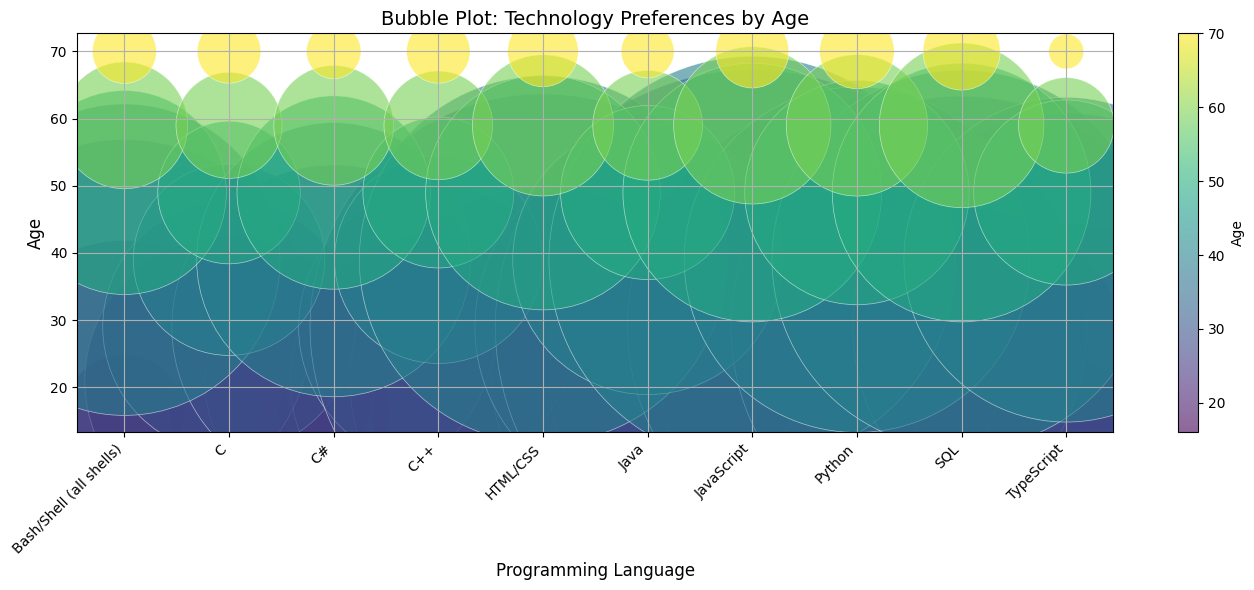

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Map Age ranges to numeric values for easier plotting
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing age or missing LanguageHaveWorkedWith
df_cleaned = df.dropna(subset=['Age_numeric', 'LanguageHaveWorkedWith'])

# Split the languages into individual rows
df_languages = df_cleaned.assign(Language=df_cleaned['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Group by Age and Language to count frequency
language_counts = df_languages.groupby(['Age_numeric', 'Language']).size().reset_index(name='Frequency')

# Optional: take top 10 languages by total frequency for readability
top_languages = language_counts.groupby('Language')['Frequency'].sum().sort_values(ascending=False).head(10).index
language_counts_top = language_counts[language_counts['Language'].isin(top_languages)]

# Create bubble plot
plt.figure(figsize=(14, 6))
scatter = plt.scatter(
    x=language_counts_top['Language'],
    y=language_counts_top['Age_numeric'],
    s=language_counts_top['Frequency']*10,  # scale bubble size
    alpha=0.6,
    c=language_counts_top['Age_numeric'],   # color by age
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and title
plt.title('Bubble Plot: Technology Preferences by Age', fontsize=14)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Age')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


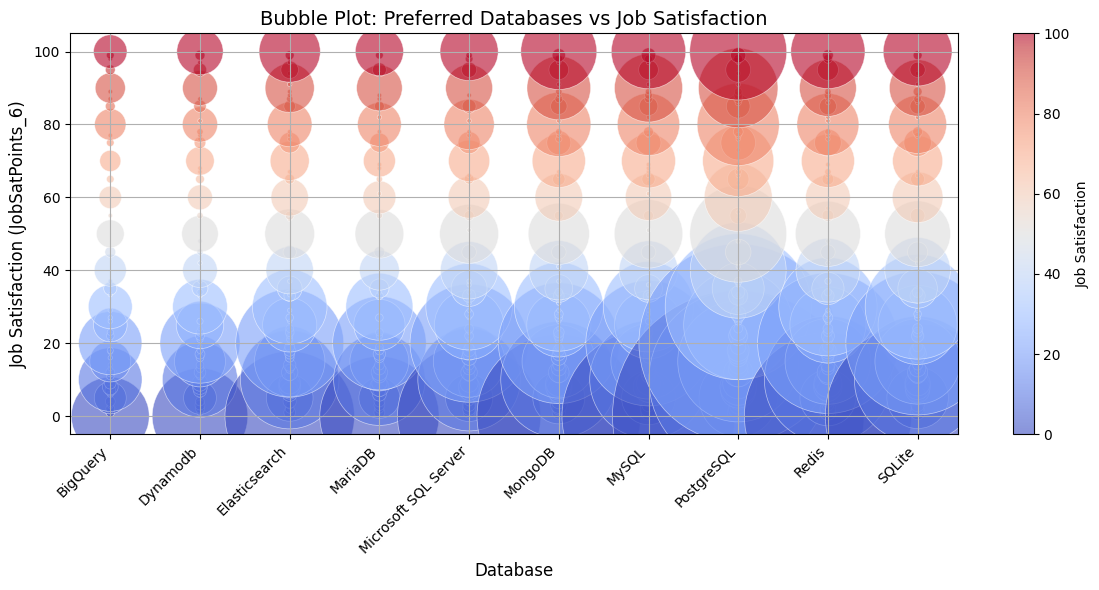

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Ensure JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing Job Satisfaction or DatabaseWantToWorkWith
df_cleaned = df.dropna(subset=['JobSatPoints_6', 'DatabaseWantToWorkWith'])

# Split multiple databases into individual rows
df_databases = df_cleaned.assign(Database=df_cleaned['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Group by Database and Job Satisfaction, count number of respondents
db_counts = df_databases.groupby(['Database', 'JobSatPoints_6']).size().reset_index(name='RespondentCount')

# Optional: take top 10 databases by total respondents
top_dbs = db_counts.groupby('Database')['RespondentCount'].sum().sort_values(ascending=False).head(10).index
db_counts_top = db_counts[db_counts['Database'].isin(top_dbs)]

# Create bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=db_counts_top['Database'],
    y=db_counts_top['JobSatPoints_6'],
    s=db_counts_top['RespondentCount']*10,  # bubble size proportional to respondent count
    alpha=0.6,
    c=db_counts_top['JobSatPoints_6'],       # color by job satisfaction
    cmap='coolwarm',
    edgecolors='w',
    linewidth=0.5
)

# Add labels and title
plt.title('Bubble Plot: Preferred Databases vs Job Satisfaction', fontsize=14)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


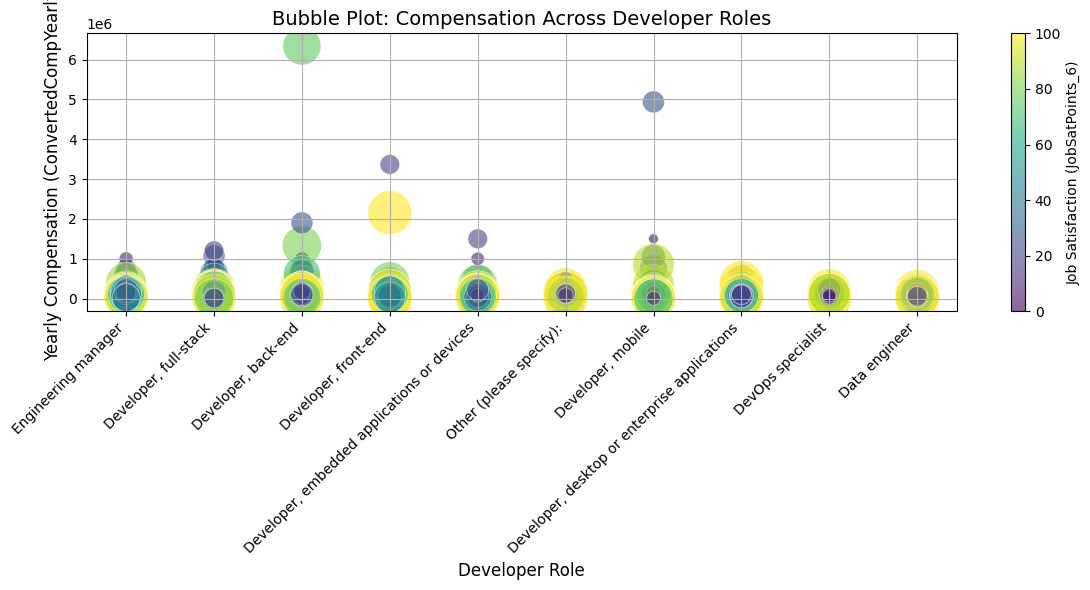

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing data
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'DevType'])

# Split multiple developer roles into separate rows
df_roles = df_cleaned.assign(DevType=df_cleaned['DevType'].str.split(';')).explode('DevType')

# Optional: Keep top 10 most common developer roles for readability
top_roles = df_roles['DevType'].value_counts().head(10).index
df_roles_top = df_roles[df_roles['DevType'].isin(top_roles)]

# Create bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df_roles_top['DevType'],
    y=df_roles_top['ConvertedCompYearly'],
    s=df_roles_top['JobSatPoints_6']*10,  # Bubble size proportional to Job Satisfaction
    alpha=0.6,
    c=df_roles_top['JobSatPoints_6'],     # Color based on Job Satisfaction
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

# Labels and title
plt.title('Bubble Plot: Compensation Across Developer Roles', fontsize=14)
plt.xlabel('Developer Role', fontsize=12)
plt.ylabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


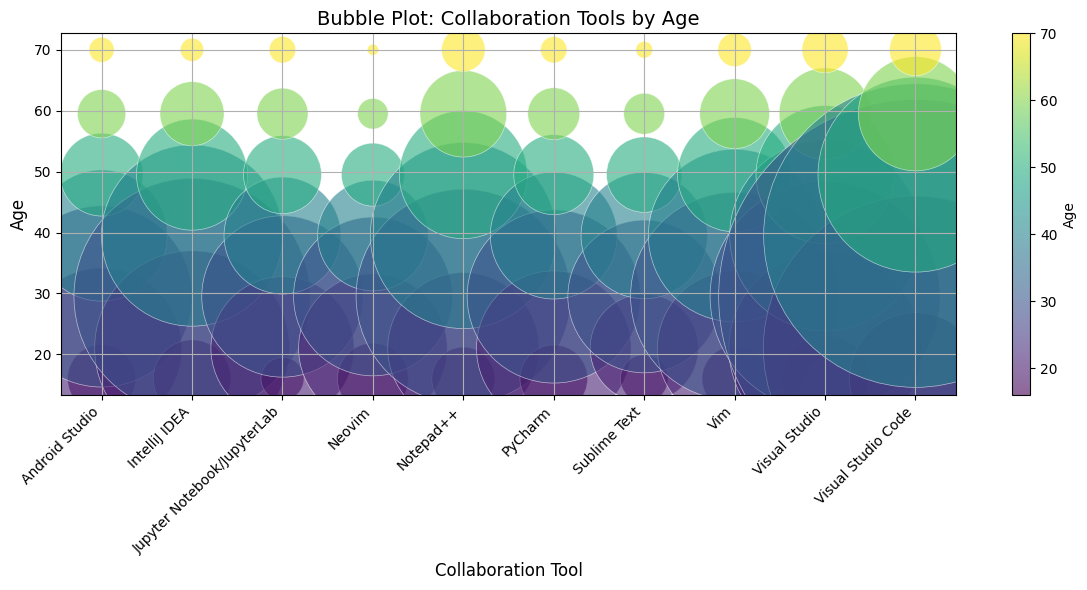

In [13]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Convert Age to numeric by mapping ranges to median values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age'] = df['Age'].map(age_mapping)

# Drop rows with missing Age or Collaboration Tools
df_cleaned = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# Split multiple tools into separate rows
df_tools = df_cleaned.assign(NEWCollabToolsHaveWorkedWith=df_cleaned['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Count frequency of each tool per age (for bubble size)
df_tools_count = df_tools.groupby(['NEWCollabToolsHaveWorkedWith', 'Age']).size().reset_index(name='Frequency')

# Optional: Keep top 10 tools for readability
top_tools = df_tools['NEWCollabToolsHaveWorkedWith'].value_counts().head(10).index
df_tools_count = df_tools_count[df_tools_count['NEWCollabToolsHaveWorkedWith'].isin(top_tools)]

# Create bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df_tools_count['NEWCollabToolsHaveWorkedWith'],
    y=df_tools_count['Age'],
    s=df_tools_count['Frequency']*5,  # Bubble size proportional to frequency
    alpha=0.6,
    c=df_tools_count['Age'],          # Color based on age
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

# Labels and title
plt.title('Bubble Plot: Collaboration Tools by Age', fontsize=14)
plt.xlabel('Collaboration Tool', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Age')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



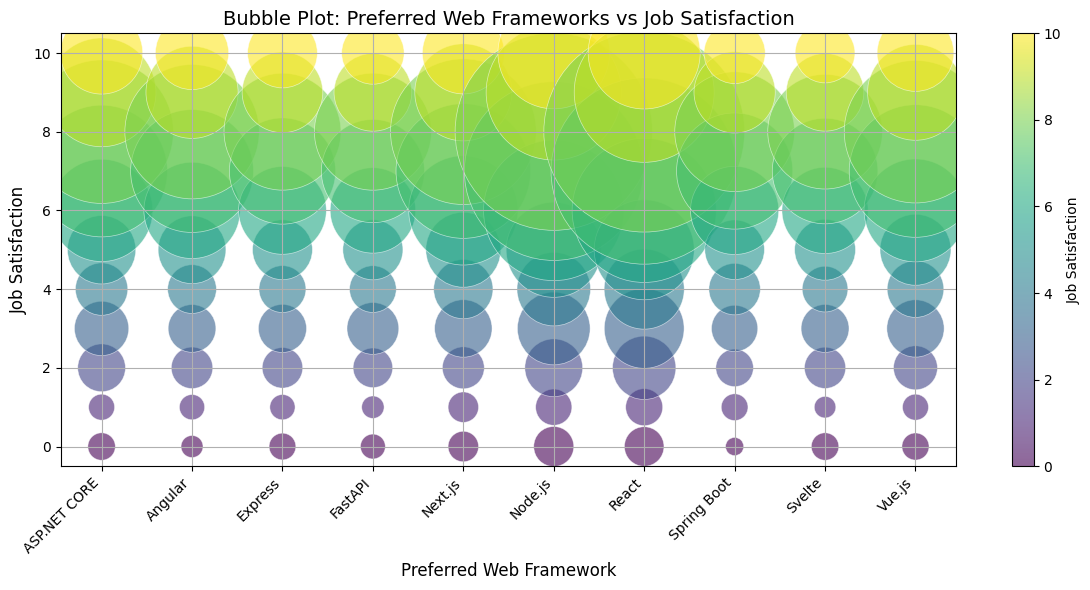

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in 'WebframeWantToWorkWith' or 'JobSat'
df_cleaned = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Split multiple frameworks into separate rows (because respondents may have chosen multiple frameworks)
df_webframes = df_cleaned.assign(WebframeWantToWorkWith=df_cleaned['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Count frequency of each framework by job satisfaction level
df_webframes_count = df_webframes.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

# Optional: Keep top 10 most preferred web frameworks for readability
top_webframes = df_webframes['WebframeWantToWorkWith'].value_counts().head(10).index
df_webframes_count = df_webframes_count[df_webframes_count['WebframeWantToWorkWith'].isin(top_webframes)]

# Create bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df_webframes_count['WebframeWantToWorkWith'],
    y=df_webframes_count['JobSat'],
    s=df_webframes_count['Frequency']*10,  # Bubble size proportional to frequency
    alpha=0.6,
    c=df_webframes_count['JobSat'],       # Color based on Job Satisfaction
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

# Labels and title
plt.title('Bubble Plot: Preferred Web Frameworks vs Job Satisfaction', fontsize=14)
plt.xlabel('Preferred Web Framework', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



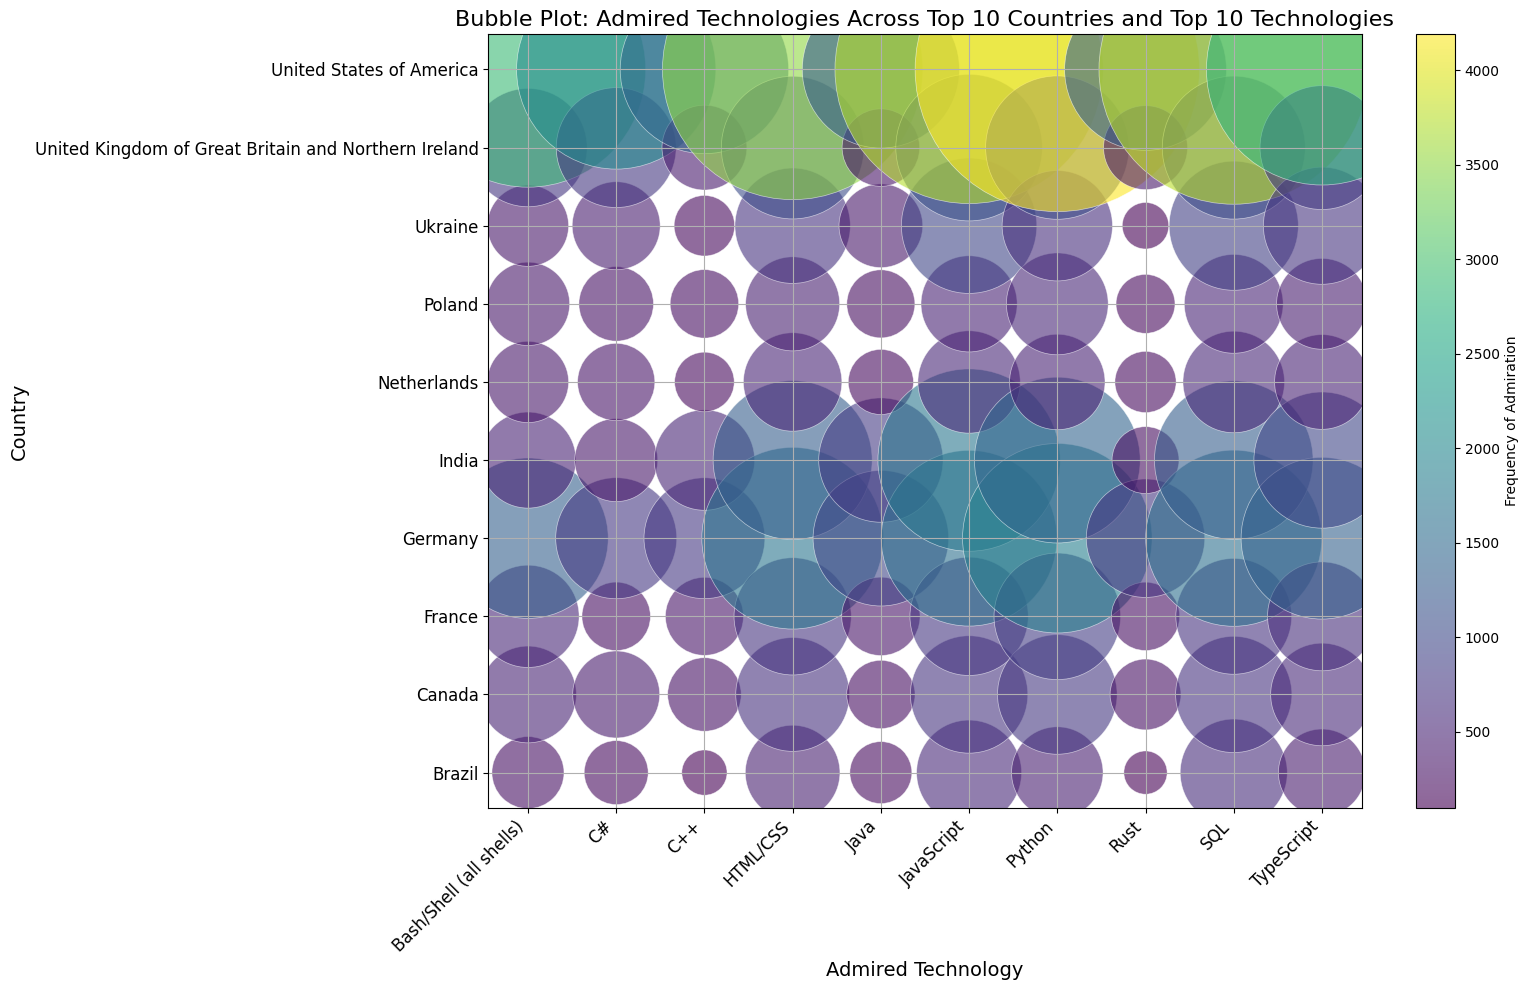

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in 'LanguageAdmired' or 'Country'
df_cleaned = df.dropna(subset=['LanguageAdmired', 'Country'])

# Split multiple admired technologies into separate rows (respondents may admire multiple technologies)
df_admired = df_cleaned.assign(LanguageAdmired=df_cleaned['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Count frequency of each admired technology by country
df_admired_count = df_admired.groupby(['LanguageAdmired', 'Country']).size().reset_index(name='Frequency')

# Get the top 10 admired technologies by frequency
top_technologies = df_admired_count.groupby('LanguageAdmired')['Frequency'].sum().nlargest(10).index

# Get the top 10 countries by the number of respondents
top_countries = df_admired['Country'].value_counts().head(10).index

# Filter the data to only include top 10 countries and top 10 technologies
df_admired_count = df_admired_count[df_admired_count['LanguageAdmired'].isin(top_technologies) & df_admired_count['Country'].isin(top_countries)]

# Create the bubble plot
plt.figure(figsize=(16, 10))  # Increase figure size
scatter = plt.scatter(
    x=df_admired_count['LanguageAdmired'],
    y=df_admired_count['Country'],
    s=df_admired_count['Frequency']*10,  # Bubble size proportional to frequency
    alpha=0.6,
    c=df_admired_count['Frequency'],  # Color bubbles based on frequency of admiration
    cmap='viridis',  # Color map for frequency
    edgecolors='w',  # White border for the bubbles
    linewidth=0.5
)

# Add labels and title
plt.title('Bubble Plot: Admired Technologies Across Top 10 Countries and Top 10 Technologies', fontsize=16)
plt.xlabel('Admired Technology', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal

# Add color bar to represent frequency
plt.colorbar(scatter, label='Frequency of Admiration')

# Show grid and adjust layout
plt.grid(True)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Final Review: Bubble Plot Analysis

### Objective Overview
In this lab, we leveraged **bubble plots** to visualize and analyze multiple dimensions of developer data, including preferences, compensation trends, job satisfaction, and more. By focusing on visualizing relationships between various features, we gained insights into how developers’ demographics and behaviors correlate.

### Key Findings:
1. **Compensation Trends:**
   - Explored how **yearly compensation** correlates with job satisfaction, age, and employment type using bubble sizes and colors to highlight different variables.
  
2. **Technology Preferences:**
   - Analyzed developers' preferences for **programming languages, frameworks, and databases**, using bubble plots to represent the frequency of use and popularity across different age groups and countries.
   
3. **Job Satisfaction Insights:**
   - Investigated how **job satisfaction** is influenced by factors like age, work experience, and the technologies developers admire, using bubble size to indicate satisfaction levels or the number of respondents.

4. **Cross-Dimensional Analysis:**
   - Visualized comparisons across multiple groups, such as **developer roles** and **country**, giving insights into how compensation and job satisfaction vary across different demographics and regions.

### Skills Gained:
- Mastered creating and interpreting **bubble plots** as an effective tool for exploring and comparing complex relationships in data.
- Gained practical experience in using **bubble size** and **color** to represent multiple variables simultaneously, making it easier to spot trends and outliers.
- Applied **visualization techniques** to understand developer preferences, compensation distributions, and factors affecting job satisfaction.

### Summary of Accomplishments:
By the end of this lab, you can:
- Effectively use bubble plots to explore multiple data features.
- Visualize complex relationships, uncover trends, and identify patterns in large datasets.
- Use **data visualization** to gain a deeper understanding of developer community dynamics and their work experiences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
